In [1]:
# import the required libraries
import numpy as np
import scipy.stats
import functools
import pandas as pd
import argparse
import scipy as sc
import numpy.matlib as npm
import sys
import random
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
def compute_ci(data):

    n = data.shape[1]
    se = scipy.stats.sem(data, axis = 0)
    h = se * scipy.stats.t.ppf(1.95 / 2., n-1)
    return h

In [25]:
def lag_fig(xmapy_surr, ymapx_surr, xmapy, ymapx, x_name, y_name):
    x = np.arange(-10,11)

    mean_xmapy = xmapy.mean(axis = 0)
    mean_ymapx = ymapx.mean(axis = 0)

    ci_xmapy = compute_ci(xmapy)
    ci_ymapx = compute_ci(ymapx)
    
    ci_xmapy_surr = compute_ci(xmapy_surr)
    ci_ymapx_surr = compute_ci(ymapx_surr)
    
    plt.clf()

    fig = plt.figure(figsize = (8,6))
    
#     name_x = x_name[:3]
#     name_y = y_name[:3]

    plt.plot(x, mean_xmapy, 'C0-', label= y_name + r'$\rightarrow$' + x_name)
    plt.plot(x, xmapy_surr.mean(axis = 0), 'C0--', label = y_name + r'$\rightarrow$' + x_name + ' surrogate')
    plt.fill_between(x, mean_xmapy - ci_xmapy, mean_xmapy + ci_xmapy, color='C0', alpha=0.2)
    plt.fill_between(x, xmapy_surr.mean(axis = 0) - ci_xmapy_surr, xmapy_surr.mean(axis = 0) + ci_xmapy_surr, color='C0', alpha=0.1)

    plt.plot(x, mean_ymapx, 'C1-', label= x_name + r'$\rightarrow$' + y_name)
    plt.plot(x, ymapx_surr.mean(axis = 0), 'C1--', label = x_name + r'$\rightarrow$' + y_name + ' surrogate')
    plt.fill_between(x, mean_ymapx - ci_ymapx, mean_ymapx + ci_ymapx, color='C1', alpha=0.2)
    plt.fill_between(x, ymapx_surr.mean(axis = 0) - ci_ymapx_surr, ymapx_surr.mean(axis = 0) + ci_ymapx_surr, color='C1', alpha=0.1)

    plt.xticks(x)
    plt.grid(linestyle = '--', alpha = 0.5)

    plt.ylabel(r'$\rho$', rotation = 0)
    plt.xlabel(r'$\tau$')
    #plt.title('Correlation vs Lag')
    plt.legend(loc = 1)
    name = x_name + '_' + y_name + '_plot.png'
    plt.savefig(name, dpi=300)
    plt.close(fig)
    #plt.show()

#     return fig

In [23]:
test = np.load('results_maizuru_twin/Aurelia.sp_Chaenogobius.gulosus.npy')

<Figure size 432x288 with 0 Axes>

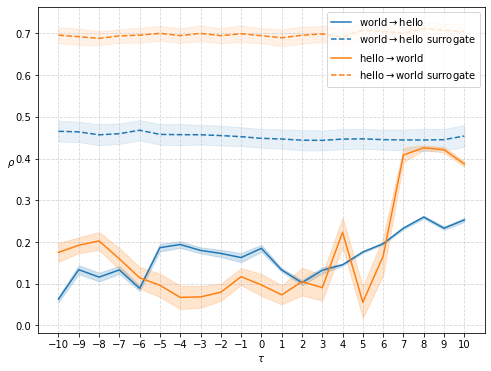

In [24]:
lag_fig(test[:,:,0], test[:,:,1], test[:,:,2], test[:,:,3], x_name = 'hello', y_name = 'world')

In [9]:
relabelling_maizuru = {
    'Aurelia.sp': 'As',
    'Chaenogobius.gulosus': 'Cg',
    'Engraulis.japonicus': 'Ej',
    'Girella.punctata': 'Gp',
    'Halichoeres.poecilopterus': 'Hp',
    'Halichoeres.tenuispinnis': 'Ht',
    'Plotosus.lineatus': 'Pl',
    'Pseudolabrus.sieboldi': 'Ps',
    'Pterogobius.zonoleucus': 'Pz',
    'Rudarius.ercodes': 'Re',
    'Sebastes.inermis': 'Si',
    'Siganus.fuscescens': 'Sf',
    'Sphyraena.pinguis': 'Sp',
    'Trachurus.japonicus': 'Tj',
    'Tridentiger.trigonocephalus': 'Tt',
}

In [10]:
combs = np.loadtxt('combs_maizuru.csv', delimiter = ',', dtype = str)

In [11]:
combs

array([['Aurelia.sp', 'Engraulis.japonicus'],
       ['Aurelia.sp', 'Plotosus.lineatus'],
       ['Aurelia.sp', 'Sebastes.inermis'],
       ['Aurelia.sp', 'Trachurus.japonicus'],
       ['Aurelia.sp', 'Girella.punctata'],
       ['Aurelia.sp', 'Pseudolabrus.sieboldi'],
       ['Aurelia.sp', 'Halichoeres.poecilopterus'],
       ['Aurelia.sp', 'Halichoeres.tenuispinnis'],
       ['Aurelia.sp', 'Chaenogobius.gulosus'],
       ['Aurelia.sp', 'Pterogobius.zonoleucus'],
       ['Aurelia.sp', 'Tridentiger.trigonocephalus'],
       ['Aurelia.sp', 'Siganus.fuscescens'],
       ['Aurelia.sp', 'Sphyraena.pinguis'],
       ['Aurelia.sp', 'Rudarius.ercodes'],
       ['Engraulis.japonicus', 'Plotosus.lineatus'],
       ['Engraulis.japonicus', 'Sebastes.inermis'],
       ['Engraulis.japonicus', 'Trachurus.japonicus'],
       ['Engraulis.japonicus', 'Girella.punctata'],
       ['Engraulis.japonicus', 'Pseudolabrus.sieboldi'],
       ['Engraulis.japonicus', 'Halichoeres.poecilopterus'],
       ['Engrau

In [12]:
relabelling_maizuru['Aurelia.sp']

'As'

In [26]:
for comb in combs:
    file = 'results_maizuru_twin/' + str(comb[0]) + '_' + str(comb[1]) + '.npy'
    corrs = np.load(file)
    x_short = relabelling_maizuru[comb[0]]
    y_short = relabelling_maizuru[comb[1]]
    lag_fig(corrs[:,:,0], corrs[:,:,1], corrs[:,:,2], corrs[:,:,3], x_short, y_short)

<Figure size 432x288 with 0 Axes>